# Introduction to Supervised Machine Learning
By AA Miller (2017 September 16)  
Updated by G Hosseinzadeh (2025 May 15)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

The iris data set we used previously actually consists of data from 3 distinct flower species.

Load the data set again. What are the names of the three species, and how many samples of each are there?

There are 3 types of species called Setosa,Versicolour,Virginica. They all have 50 data points each.

In [24]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris['DESCR'])

iris

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Make a pair plot of the iris features colored by their true classification.

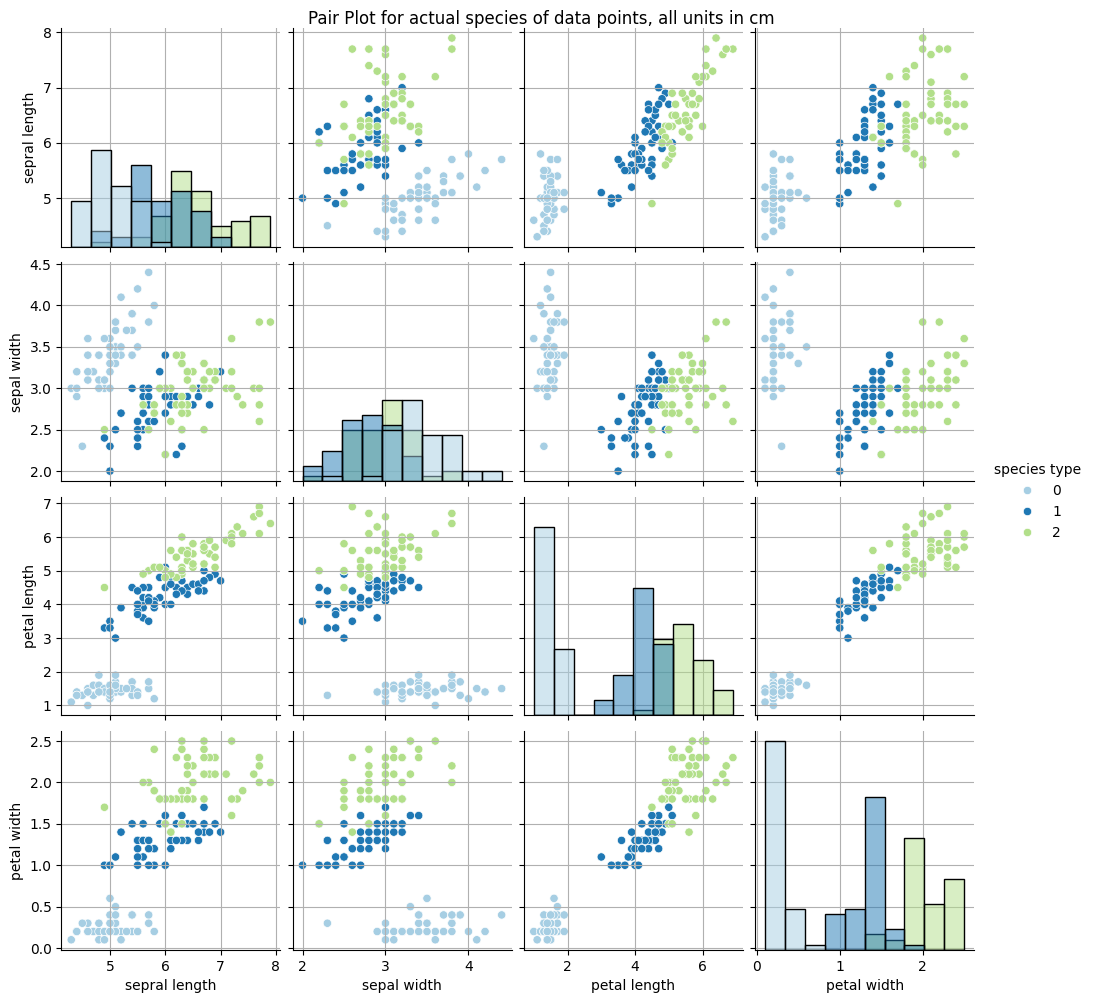

In [25]:
import pandas as pd
import seaborn as sns

true_vals = (iris['target'])

iris_p = pd.DataFrame(iris['data'], columns =[ 'sepral length','sepal width','petal length','petal width'])

#iris['target'].astype(str)

iris_p['species type'] = true_vals

fig = sns.pairplot(iris_p, hue = 'species type' , diag_kws = {"bins": 10}, diag_kind = "hist",palette = "Paired")

for ax in fig.axes.flatten():
    if ax is not None:
        ax.grid(True)
#plt.show()


plt.suptitle("Pair Plot for actual species of data points, all units in cm", y =1.)

plt.show()


Fit two different $K$ nearest neighbors (KNN) models to the iris data, one with 3 neighbors and one with 10 neighbors. Repeat the pair plot colored by the predicted classifications. How do the results compare to the true classifications?

In this case you're training and testing your model using the same data set. Is that a good idea?

*Hint that isn't essential, but is worth thinking about - should the features be re-scaled in any way?*

In [56]:
pred3_p = iris_p.copy()
pred10_p = iris_p.copy()

In [57]:
pred3_p

,sepral length,sepal width,petal length,petal width,species type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [58]:
from sklearn.neighbors import KNeighborsClassifier

n3 = KNeighborsClassifier(n_neighbors=3)
n3.fit(pred3_p, true_vals)
n10 = KNeighborsClassifier(n_neighbors=10)
n10.fit(pred10_p, true_vals)
# complete

prediction3 = n3.predict(pred3_p)
prediction10 =n10.predict(pred10_p)

pred3_p['Predicted Cluster Species'] = prediction3
pred10_p['Predicted Cluster Species'] = prediction10

In [59]:
pred3_p

,sepral length,sepal width,petal length,petal width,species type,Predicted Cluster Species
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [60]:
print(pred3_p[pred3_p['species type'] != pred3_p['Predicted Cluster Species']])

Empty DataFrame
Columns: [sepral length, sepal width, petal length, petal width, species type, Predicted Cluster Species]
Index: []


<Figure size 640x480 with 0 Axes>

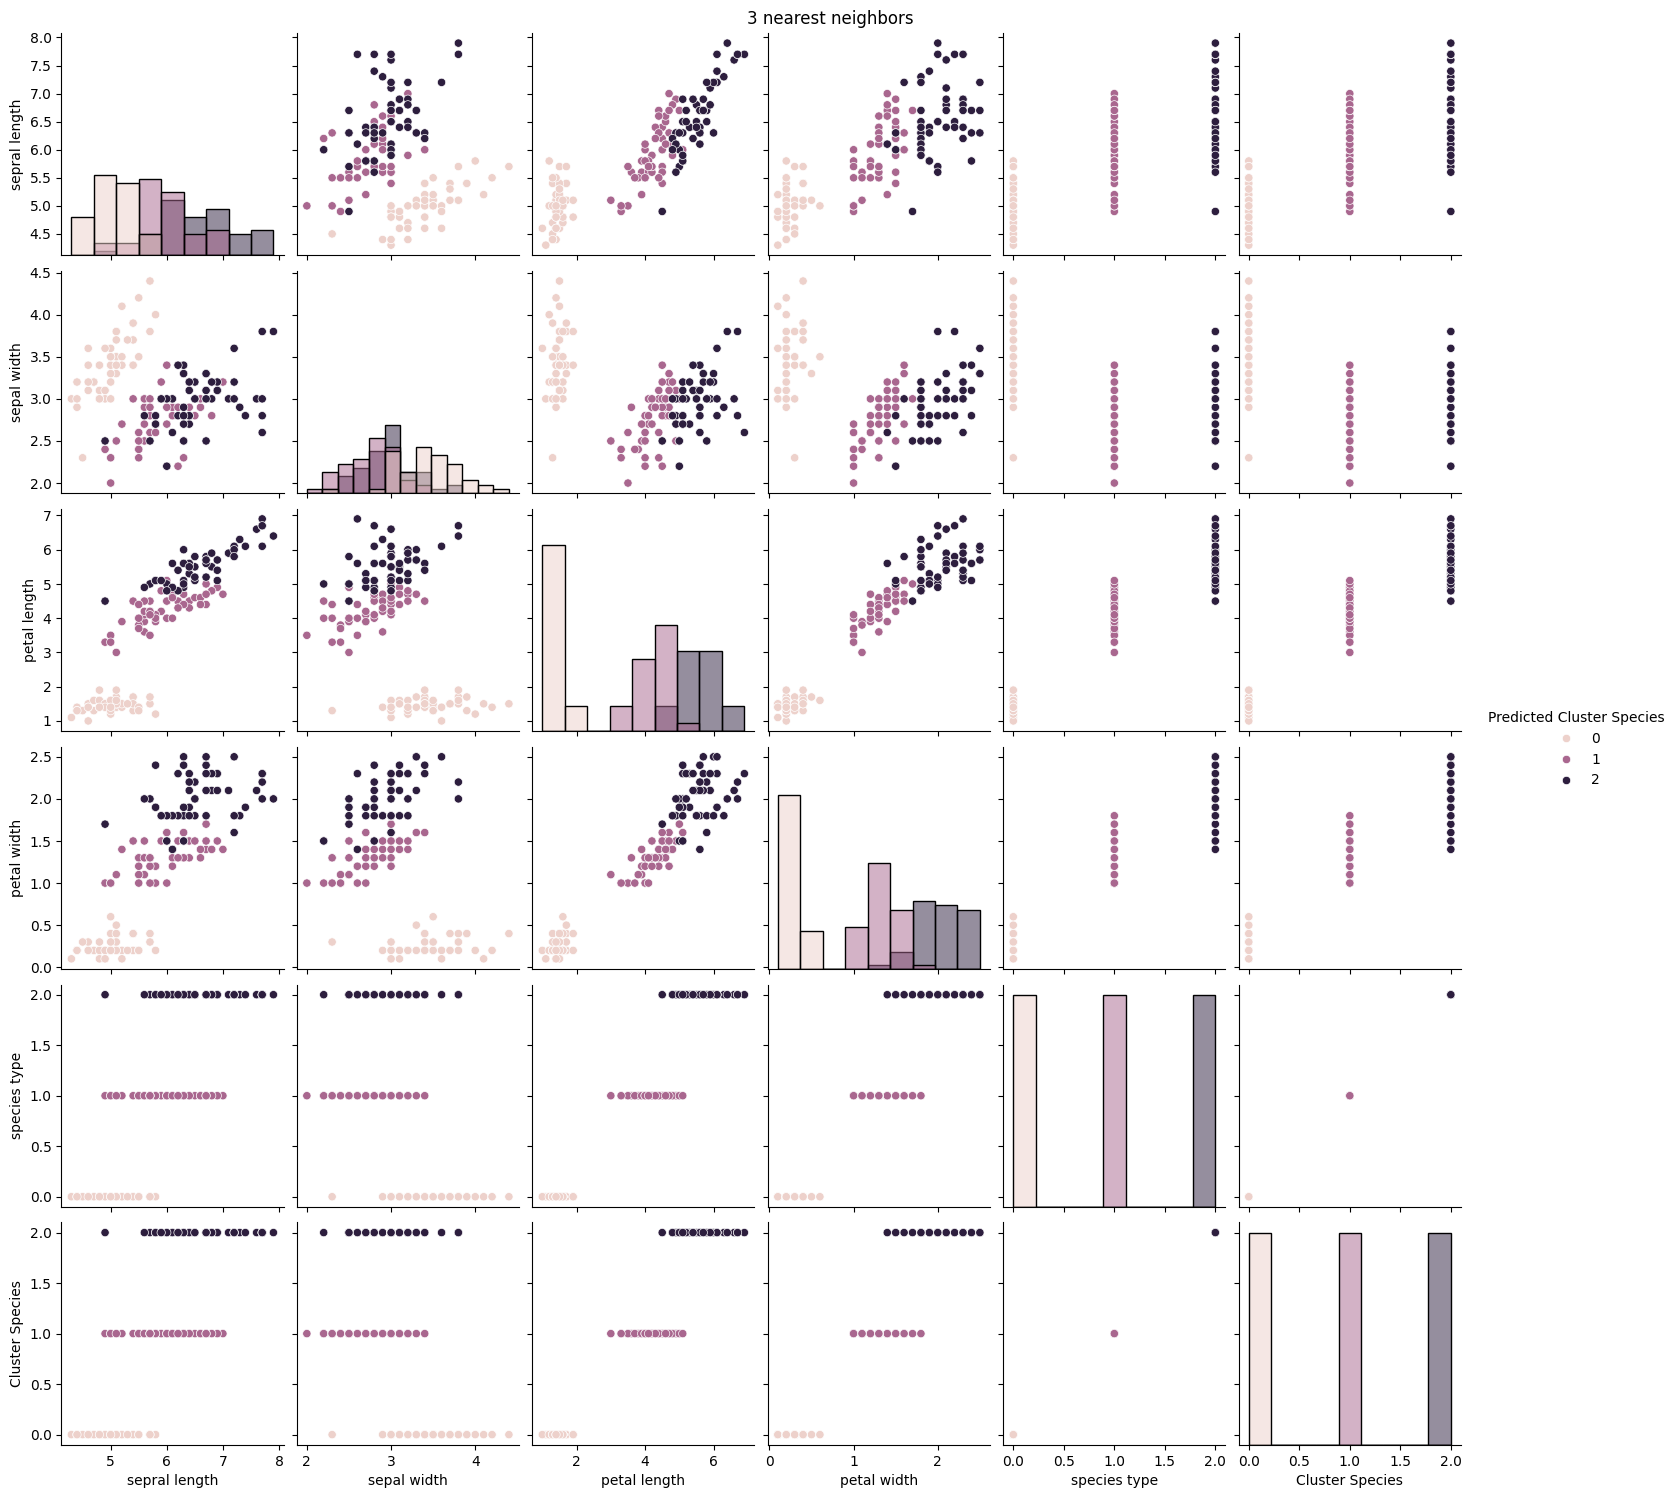

<Figure size 640x480 with 0 Axes>

In [67]:
from sklearn.neighbors import KNeighborsClassifier

n3 = KNeighborsClassifier(n_neighbors=3)
n3.fit(pred3_p, true_vals)
prediction3 = n3.predict(pred3_p)
pred3_p_plot = pred3_p.copy()
pred3_p_plot['Predicted Cluster Species'] = prediction3
pred3_p_plot['Predicted Cluster Species'] = prediction3.astype(str)
fig3 = sns.pairplot(pred3_p
                    , hue = 'Predicted Cluster Species' ,diag_kind = "hist")
for ax in fig.axes.flatten():
    if ax is not None:
        ax.grid(True)
plt.suptitle("3 nearest neighbors", y=1)
plt.figure()


*Complete*

Produce cross-validation predictions for the iris dataset and a KNN with 5 neighbors. Plot the resulting classifications, as above, and estimate the accuracy of the model as applied to new data. How does this accuracy compare to a KNN with 50 neighbors?

*Hint - read the docs for [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)*

In [ ]:
# complete
# complete
# complete
# complete

# complete
# complete
# complete
# complete

While it is useful to understand the overall accuracy of the model, it is even more useful to understand the nature of the misclassifications that occur. Calculate the completeness and purity for each class in the iris set, as determined via cross validation for the $K = 50$ model. Do your numbers make sense? Use the plot above to explain.

In [ ]:
# complete
# complete
# complete
# complete
# complete

*Complete*

In addition to knowing the completeness and purity for the individual classes, it is also useful to know class predictions for the misclassified sources, or in other words where there is "confusion" for the classifier.

Calculate the confusion matrix for the iris training set and the $K = 50$ model using `sklearn.metrics.confusion_matrix`. Plot three versions of the matrix: (1) the unnormalized matrix, (2) the matrix normalized by rows, and (3) the matrix normalized by columns. Make sure to label your axes and give each plot a title. Which plot(s) is/are most useful, and why?

*Hint - you might find the [`sklearn` confusion matrix tutorial](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py) helpful for making a nice plot.*

In [ ]:
# complete
# complete
# complete
# complete
# complete

*Complete*